<h1 align='center'>Data Wrangling - Instacart</h1>

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar y recibir un pedido, similar a Uber Eats y Door Dash.
El conjunto de datos proporcionados tiene modificaciones del original. Se redujo el tamaño del conjunto para que los cálculos se hicieran más rápido y se introdujeron valores ausentes y duplicados. Se tuvo cuidado al conservar las distribuciones de los datos originales cuando se realizarion los cambios.

## Objetivo:

Limpiar los datos y elaborar un informe que proporcione información detallada sobre los hábitos de compra de los clientes de Instacart.

## Etapas

**Paso 1:** Abrir los archivos de datos, el conjunto de datos se almacenan en los siguientes directorios: 
- Orders: `/datasets/instacart_orders.csv`
- Products: `/datasets/products.csv`
- Aisles: `/datasets/aisles.csv`
- Departments: `/datasets/departments.csv`
- Ordered products:`/datasets/order_products.csv`.

Observar que los archivos tienen un formato no estándar, así que se va a necesitar establecer ciertos argumentos en `pd.read_csv()` para leer los datos correctamente. Mira los archivos CSV para tener una idea de cuáles deberían ser esos argumentos.

**Paso 2:** Preprocesar los datos de la siguiente manera:

1. Verificar y corrigir los tipos de datos (por ejemplo, asegurarse de que las columnas de ID sean números enteros).
2. Identificar y completar los valores ausentes.
3. Identificar y eliminar los valores duplicados.
4. Asegurarse de explicar qué tipos de valores ausentes y duplicados se encontró, cómo se los completó o eliminó y por qué se usaron esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

**Paso 3:** Una vez que los datos estén procesados y listos, realizar el siguiente análisis:

**[Sección A]**

- Verificar que los valores en las columnas 'order_hour_of_day' y 'order_dow' de la tabla orders sean razonables (o sea, 'order_hour_of_day' va de 0 a 23 y 'order_dow' va de 0 a 6).
- Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
- Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
- Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su próximo pedido, y comentar los valores mínimos y máximos.

**[Sección B]**

- ¿Hay alguna diferencia en las distribuciones de 'order_hour_of_day' en miércoles y sábados? Trazar los histogramas de ambos días en el mismo gráfico y describir las diferencias observadas.
- Trazar la distribución del número de pedidos que hacen los clientes(por ejemplo, cuántos clientes hicieron un solo pedido, cuántos hicieron solo dos, cuántos solo tres, etc.)
- ¿Cuáles son los 20 principales productos que se piden con más frecuencia (mostrar su identificación y nombre)?

**[Sección C]**

- ¿Cuántos artículos compra la gente por lo general en un pedido? ¿Cómo es la distribución?
- ¿Cuáles son los 20 principales artículos que se vuelven a pedir con más frecuencia (mostrar sus nombres e identificaciones de producto)?
- Para cada producto, ¿qué proporción de sus pedidos se vuelven a pedir (crear una tabla con columnas para el ID del producto, el nombre del producto y la proporción en que se ha vuelto a comprar)?
- ¿Cuál es la proporción de productos pedidos que se vuelven a pedir para cada cliente?
- ¿Cuáles son los 20 principales artículos que la gente pone en sus carritos primero (mostrar las identificaciones de los productos, los nombres de los productos y el número de veces que fueron el primer artículo añadido al carrito)?


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y se tendrán que usar todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Contenido <a id='back'></a>

* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Plan de solución](#solution_plan)
    * [2.2 Encuentra y elimina los valores duplicados](#drop_duplicated)
    * [2.3 Encuentra y elimina los valores ausentes](#drop_nan)
    * [2.4 Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Análisis de los datos](#data_analysis)
    * [3.1 Sección A](#section_a)
    * [3.2 Sección B](#section_b)
    * [3.3 Sección C](#section_c)
* [Conclusion general del proyecto](#end)

## Etapa 1. Descripción de los datos <a id='data_review'></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Acceso a los registros de los recursos "orders", "products", "aisles", "departments" y "order products"

df_orders = pd.read_csv('./datasets/instacart_orders.csv', sep=';')

df_products = pd.read_csv('./datasets/products.csv', sep=';')

df_aisles = pd.read_csv('./datasets/aisles.csv', sep=';')

df_departments = pd.read_csv('./datasets/departments.csv', sep=';')

df_order_products = pd.read_csv('./datasets/order_products.csv', sep=';')

In [3]:
# Obtener información general sobre los registros del DataFrame 'orders'

print("\033[1m Muestra aleatoria de filas del DataFrame 'orders':")

display(df_orders.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'orders':\033[0m \n")

df_orders.info()

 Muestra aleatoria de filas del DataFrame 'orders':


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
77772,1130428,17029,5,2,15,3.0
212731,1027172,162867,17,2,6,7.0
68753,1844664,174589,2,1,12,20.0
136622,1566334,165049,32,4,7,3.0
252058,588477,180156,25,1,14,7.0
44187,2895469,92252,8,0,11,10.0
223687,879468,61890,3,3,14,30.0
31709,864021,158068,1,1,13,NaN
410509,494911,184836,1,2,9,NaN
303932,1923932,71847,9,1,10,20.0


 Resumen del DataFrame 'orders': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# Obtener información general sobre los registros del DataFrame 'products'

print("\033[1m Muestra aleatoria de filas del DataFrame 'products':")

display(df_products.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'products':\033[0m \n")

df_products.info()

 Muestra aleatoria de filas del DataFrame 'products':


,product_id,product_name,aisle_id,department_id
36853,36854,Hot Sauce,72,13
40962,40963,Odorshield 13 Gallon Tall Kitchen Trash Bag Wi...,60,17
34614,34615,Golden Yellow Bell Peppers,83,4
29229,29230,Ultra Double 3 Ply,54,17
38386,38387,Vanilla Bite Size Wafer Cookies,61,19
5619,5620,100% Recycled 1 Ply White Napkins,54,17
48604,48605,Ball Pens Medium 1.0 mm Black,87,17
35986,35987,Merlot- California 2013,28,5
38784,38785,Ultraclean Arctic Mint,20,11
11244,11245,Olives in Brine Olive Medley,110,13


 Resumen del DataFrame 'products': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# Obtener información general sobre los registros del DataFrame 'aisles'

print("\033[1m Muestra aleatoria de filas del DataFrame 'aisles':")

display(df_aisles.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'aisles':\033[0m \n")

df_aisles.info()

 Muestra aleatoria de filas del DataFrame 'aisles':


,aisle_id,aisle
16,17,baking ingredients
24,25,soap
11,12,fresh pasta
36,37,ice cream ice
42,43,buns rolls
43,44,eye ear care
94,95,canned meat seafood
27,28,red wines
61,62,white wines
26,27,beers coolers


 Resumen del DataFrame 'aisles': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# Obtener información general sobre los registros del DataFrame 'departments'

print("\033[1m Muestra aleatoria de filas del DataFrame 'departments':")

display(df_departments.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'departments':\033[0m \n")

df_departments.info()

 Muestra aleatoria de filas del DataFrame 'departments':


,department_id,department
12,13,pantry
10,11,personal care
16,17,household
7,8,pets
5,6,international
14,15,canned goods
0,1,frozen
19,20,deli
3,4,produce
11,12,meat seafood


 Resumen del DataFrame 'departments': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
# Obtener información general sobre los registros del DataFrame 'order_products'

print("\033[1m Muestra aleatoria de filas del DataFrame 'order_products':")

display(df_order_products.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'order_products':\033[0m \n")

df_order_products.info(show_counts=True)

 Muestra aleatoria de filas del DataFrame 'order_products':


,order_id,product_id,add_to_cart_order,reordered
1237745,649538,43295,3.0,1
335424,1295850,27690,1.0,1
2779057,515523,42585,8.0,1
2257107,853677,16548,8.0,0
3023036,3183951,30391,12.0,1
1869487,2504066,2855,5.0,1
1886949,29943,28156,14.0,1
1232079,577293,19348,5.0,1
2745455,2005253,34065,10.0,1
3441579,1583629,49496,20.0,0


 Resumen del DataFrame 'order_products': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


### Conclusiones <a id='data_review_conclusions'></a>

Existen columnas con tipos de datos incorrectos, como `days_since_prior_order` y `add_to_cart_order`, que actualmente están definidos como `float`, aunque el diccionario de datos indica que estos valores deberían ser enteros. Si durante el procesamiento de datos no se identifican valores decimales, se procederá a convertirlos al tipo de dato `int`.

[Volver a Contenidos](#back)

## Etapa 2. Preprocesamiento de los datos <a id='data_preprocessing'></a>

Preprocesar los datos de la siguiente manera:

- Verificar y corrigir los tipos de datos (por ejemplo, asegurarse de que las columnas de ID sean números enteros).
- Identificar y completar los valores ausentes.
- Identificar y eliminar los valores duplicados.

Explicar qué tipos de valores ausentes y duplicados se encontró, cómo se los completó o eliminó y por qué se usaron esos métodos. 

[Volver a Contenidos](#back)

### Plan de solución <a id='solution_plan'></a>

- En el paso anterior, se observó que `days_since_prior_order` y `add_to_cart_order` aparentemente tienen un tipo de dato incorrecto. Para verificar esto, se empleará la función `array_equal()` para asegurarse de que los datos sean de tipo entero.

- Se utilizará `value_counts()` para explorar los posibles valores que puede contener un campo e identificar cuál podría ser utilizado para reemplazar un valor ausente. En caso de no encontrar un valor adecuado, se considerarán opciones como `ND`, `otro`, `-1`, etc. La función `fillna()` será empleada para realizar dichos reemplazos.

- Además, se utilizará `duplicated()` para identificar valores duplicados. Se evaluará si la eliminación de estos valores afectaría o no al análisis de datos. En caso de que no afecte, se empleará `drop_duplicates()`.

[Volver a Contenidos](#back)

### Encuentra y elimina los valores duplicados <a id='drop_duplicated'></a>

#### Valores duplicados en `df_orders`

In [8]:
print('Cantidad de pedidos duplicados:', df_orders.duplicated().sum()) #Conteo de duplicados

df_orders[df_orders.duplicated()] #Visualización de los pedidos duplicados

Cantidad de pedidos duplicados: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Se registraron 15 pedidos duplicados, específicamente en los campos `order_dow` y `order_hour_of_day`, lo que indica que se realizaron pedidos los miércoles a las 2 a.m.

In [9]:
# Basándose en los hallazgos,
# Verificar todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

df_orders.query('order_dow == 3 and order_hour_of_day == 2')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Podríamos asumir que los valores duplicados recopilados en el paso anterior son registros erróneos y, por lo tanto, deberían ser eliminados, ya que aplicando el filtrado con las mismas características se observa que no afectaría su eliminación en ese caso puntual.

In [10]:
# Eliminar los pedidos duplicados

df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Verificar si hay filas duplicadas

print('Cantidad de pedidos duplicados:', df_orders.duplicated().sum())

Cantidad de pedidos duplicados: 0


In [12]:
# Verificar únicamente si hay IDs duplicados de pedidos

print('Cantidad de IDs duplicados:', df_orders.duplicated(subset='order_id').sum())

Cantidad de IDs duplicados: 0


El proceso comienza con la identificación de datos duplicados y para determinar la posibilidad de eliminarlos sin afectar análisis futuros, se lleva a cabo un filtrado que concluye en que los duplicados pueden ser eliminados sin repercusiones.

[Volver a Contenidos](#back)

#### Valores duplicados en `df_products`

In [13]:
# Verificar si hay filas totalmente duplicadas

print('Cantidad de filas duplicadas: ', df_products.duplicated().sum())

Cantidad de filas duplicadas:  0


In [14]:
# Verificar únicamente si hay IDs duplicadas de productos

print('Cantidad de products IDs duplicados: ', df_products['product_id'].duplicated().sum()) 

Cantidad de products IDs duplicados:  0


In [15]:
# Revisar únicamente si hay nombres duplicados de productos

df_products['product_name'] = df_products['product_name'].str.upper()

duplicate_product_name = df_products['product_name'].duplicated()

print('Cantidad de nombres de productos duplicados: ', duplicate_product_name.sum())

df_products[duplicate_product_name]

Cantidad de nombres de productos duplicados:  1361


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisar si hay nombres duplicados de productos no faltantes

df_products[(df_products['product_name'].duplicated()) & ~(df_products['product_name'].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [17]:
# Eliminar registros duplicados

df_products = df_products.drop_duplicates(subset='product_name')

In [18]:
# Verificar productos duplicados eliminados

df_products[df_products['product_name'].duplicated()]

,product_id,product_name,aisle_id,department_id


Se detectaron 1361 valores duplicados en la columna `product_name`, de los cuales 104 son distintos de valores ausentes (NaN).

[Volver a Contenidos](#back)

#### Valores duplicados en `df_departments`

In [19]:
# Revisar si hay filas totalmente duplicadas

print('Cantidad de filas duplicadas: ', df_departments.duplicated().sum())

Cantidad de filas duplicadas:  0


In [20]:
# Revisar únicamente si hay IDs duplicadas de productos

print('Cantidad de IDs duplicados: ', df_departments['department_id'].duplicated().sum())

Cantidad de IDs duplicados:  0


No se encontraron valores duplicados en el dataframe `departments`.

[Volver a Contenidos](#back)

#### Valores duplicados en `df_aisles`

In [21]:
# Revisar si hay filas totalmente duplicadas

print('Cantidad de filas duplicadas: ', df_aisles.duplicated().sum())

Cantidad de filas duplicadas:  0


In [22]:
# Revisar únicamente si hay IDs duplicadas de productos

print('Cantidad de IDs duplicados: ', df_aisles['aisle_id'].duplicated().sum())

Cantidad de IDs duplicados:  0


No se encontraron valores duplicados en el dataframe `aisles`.

[Volver a Contenidos](#back)

#### Valores duplicados en `order_products`

In [23]:
# Revisar si hay filas totalmente duplicadas

df_order_products[df_order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [24]:
# Verificar si hay cualquier otro duplicado engañoso

df_order_products[df_order_products.duplicated(subset=['order_id','product_id'])]

,order_id,product_id,add_to_cart_order,reordered


No se encontraron valores duplicados en el dataframe `order_products`.

[Volver a Contenidos](#back)

### Encuentra y elimina los valores ausentes <a id='drop_nan'></a>

Al trabajar con valores duplicados, se pudo observar que también requiere investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

[Volver a Contenidos](#back)

#### Valores ausentes en `df_products`

In [25]:
# Valores ausentes en la columna 'product_name'

df_products[df_products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Existen registros de nombres de productos a los cuales no se les ha asignado un valor.

In [26]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

df_products[(df_products['product_name'].isna()) & (df_products['aisle_id']==100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Se encontró que los valores ausentes en `product_name` están relacionados con el pasillo de ID 100.

In [27]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

df_products[(df_products['product_name'].isna()) & (df_products['department_id']==21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21


Los valores ausentes en `product_name` se relacionan con el pasillo de ID 100 y el departamento de ID 21.

In [28]:
# Uso de las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

display(df_departments[df_departments['department_id']==21])

display(df_aisles[df_aisles['aisle_id']==100])

,department_id,department
20,21,missing


,aisle_id,aisle
99,100,missing


En el pasillo con ID 21 y el departamento con ID 100, su columna correspondiente al nombre tiene asignado el valor 'missing'. Esta situación podría explicar la ausencia de registros en el DataFrame 'products', especialmente en los nombres de productos asociados a estos IDs específicos. Es probable que esta falta de información se deba a la necesidad de actualizar los datos relacionados con estos pasillos y departamentos.


In [29]:
# Completar los nombres de productos ausentes con 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('Unknown')

print('Productos con nombres ausentes: ', df_products['product_name'].isna().sum())

Productos con nombres ausentes:  0


Al identificar los valores ausentes en el DataFrame 'products' y comprender la razón de la falta de registros, se optó por sustituir los nombres faltantes por 'Unknown'.

[Volver a Contenidos](#back)

#### Valores ausentes en `df_orders`

In [30]:
# Encontrar los valores ausentes

df_orders[df_orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number']==1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


El primer pedido de los clientes conlleva a que se generen valores ausentes en `days_since_prior_order` dado que no se va a tener registros de un pedidio previo al primero.

[Volver a Contenidos](#back)

#### Valores ausentes en `df_order_products`

In [32]:
# Encontrar los valores ausentes

df_order_products[df_order_products['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?

print('Valor mínimo de `add_to_cart_order`: ',df_order_products['add_to_cart_order'].min())

print('Valor máximo de `add_to_cart_order`: ',df_order_products['add_to_cart_order'].max())

Valor mínimo de `add_to_cart_order`:  1.0
Valor máximo de `add_to_cart_order`:  64.0


No se tiene registro del orden en el que se añadieron productos al carrito en algunos casos.

In [34]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

missing_cart_order =  df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']

In [61]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
# Contar el número de 'product_id' en cada pedido y revisar el valor mínimo del conteo.

print("Valor mínimo del conteo de productos añadidos al carrito: " , 
      df_order_products[df_order_products['order_id'].isin(missing_cart_order)].groupby(by='order_id')['order_id'].count().min())


Valor mínimo del conteo de productos añadidos al carrito:  65


Todos los valores ausentes tienen más de 64 productos en `order_products` añadidos al carrito, es decir que en lugar de colocar el valor de 65 o superiores se colocaba NaN, dado algún error en el sistema.

In [63]:
# Remplazar los valores ausentes en la columna 'add_to_cart_order' con 999 y convertir la columna al tipo entero.

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)

print('Filas con valores ausentes en add_to_cart_order: ', df_order_products['add_to_cart_order'].isna().sum())

#Comprobación para determinar la factibilidad de la conversión de tipos de datos de float a int
np.array_equal(df_order_products['add_to_cart_order'], df_order_products['add_to_cart_order'].astype('int'))

Filas con valores ausentes en add_to_cart_order:  0


In [64]:
#Convertir los tipos de datos

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

Se reemplazaron los valores ausentes en `add_to_cart_order` con el valor `999`. Además, se convirtió esta columna a un tipo de dato entero, previamente verificando que dicho cambio no resultara en pérdida de información.

[Volver a Contenidos](#back)

### Conclusiones <a id='data_preprocessing_conclusions'></a>

Se logró identificar valores duplicados en los DataFrames del proyecto 'Instacart' empleando la función `duplicated()` y mediante filtros se analizó si era factible o no su eliminación, para este proceso se empleó la función `drop_duplicates()`. 

En la exploración de valores ausentes, se utilizó la función `isna()`. De acuerdo con consideraciones prácticas, estos valores fueron reemplazados mediante el uso de `fillna()`. Además, se realizaron cambios en los tipos de datos utilizando `astype()`, luego de que se verificase que no se perdiera información, esto mediante la función `array_equal()`.

[Volver a Contenidos](#back)

## Etapa 3. Análisis de los datos <a id='data_analysis'></a>

### Sección A<a id='section_a'></a>

1. Verificar que los valores en las columnas 'order_hour_of_day' y 'order_dow' de la tabla orders sean razonables (o sea, 'order_hour_of_day' va de 0 a 23 y 'order_dow' va de 0 a 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su próximo pedido, y comentar los valores mínimos y máximos.

[Volver a Contenidos](#back)

#### [A1] Verificar que los valores sean sensibles

In [37]:
df_orders.query('order_hour_of_day < 0 & order_hour_of_day > 23') #Comprobar si existen registros fuera de rango

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [38]:
df_orders.query('order_dow < 0 & order_dow > 6')#Comprobar si existen registros fuera de rango

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Aplicando el filtrado en las columnas `order_hour_of_day` y `order_dow` se verificó que no existen registros que no cumplan con las condiciones establecidas.

[Volver a Contenidos](#back)

#### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

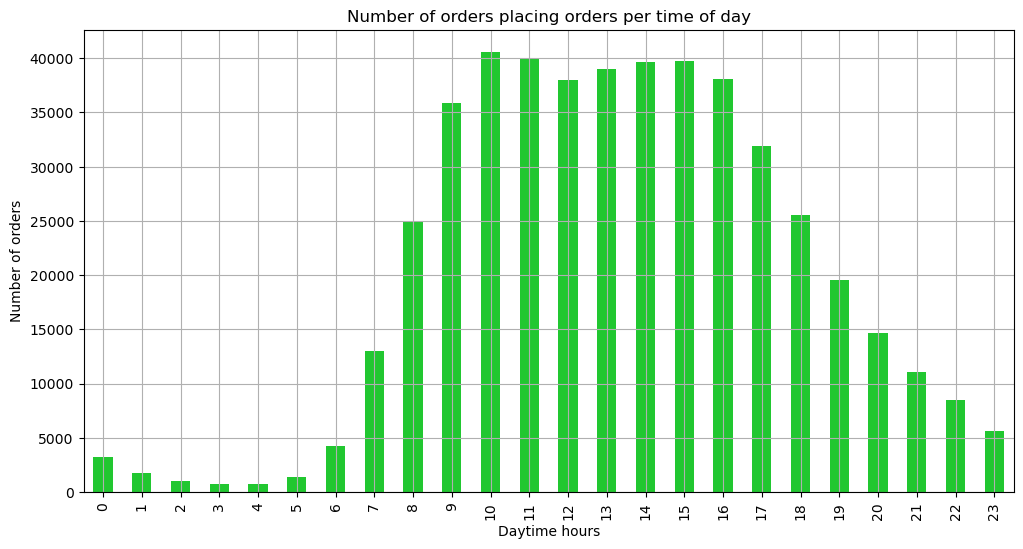

In [39]:
# Al no tener un registro directo del número de personas que hacen órdenes en una hora determinada del día,
# se realiza un conteo de las diferentes horas registradas las cuales nos permitan conocer:  

# Para cada hora del día, ¿cuántas personas hacen órdenes?
hours_counts = df_orders.groupby(by='order_hour_of_day')['order_id'].nunique()
hours_counts.plot(kind='bar', 
                xlabel='Daytime hours',
                ylabel='Number of orders',
                title='Number of orders placing orders per time of day',
                figsize=[12,6],
                grid=True,
                color='#21c730')
plt.show()

Podría afirmarse que el número de órdenes sigue una distribución normal, ya que los datos están agrupados cerca de la media, que es a las 13:00 horas. En otras palabras, se observa una mayor tendencia de compras entre las 10:00 a.m. y las 16:00 p.m.

In [65]:
print("Cálculo estadístico de la media en 'order_hour_of_day': ", df_orders['order_hour_of_day'].mean())

Cálculo estadístico de la media en 'order_hour_of_day':  13.447034358349063


[Volver a Contenidos](#back)

#### [A3] ¿Qué día de la semana compran víveres las personas?

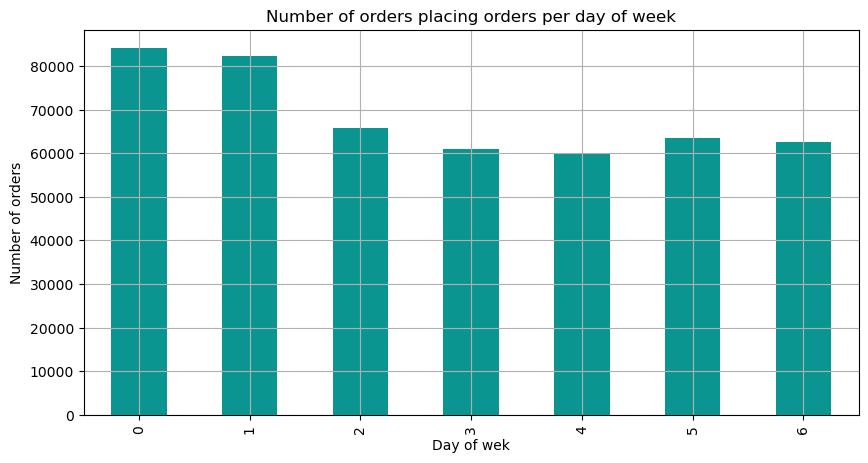

In [41]:
day_counts = df_orders.groupby(by='order_dow')['order_id'].nunique()

day_counts.plot(kind='bar', 
                xlabel='Day of wek',
                ylabel='Number of orders',
                title='Number of orders placing orders per day of week',
                figsize=[10,5],
                grid=True,
                color='#0b9591')
plt.show()

El gráfico indica que las compras tiene mayor volumen los domingos y lunes, pero, las órdenes decrecen el resto de la semana en especial los jueves, donde tiene el menor número de compras registradas. 

[Volver a Contenidos](#back)

#### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido?

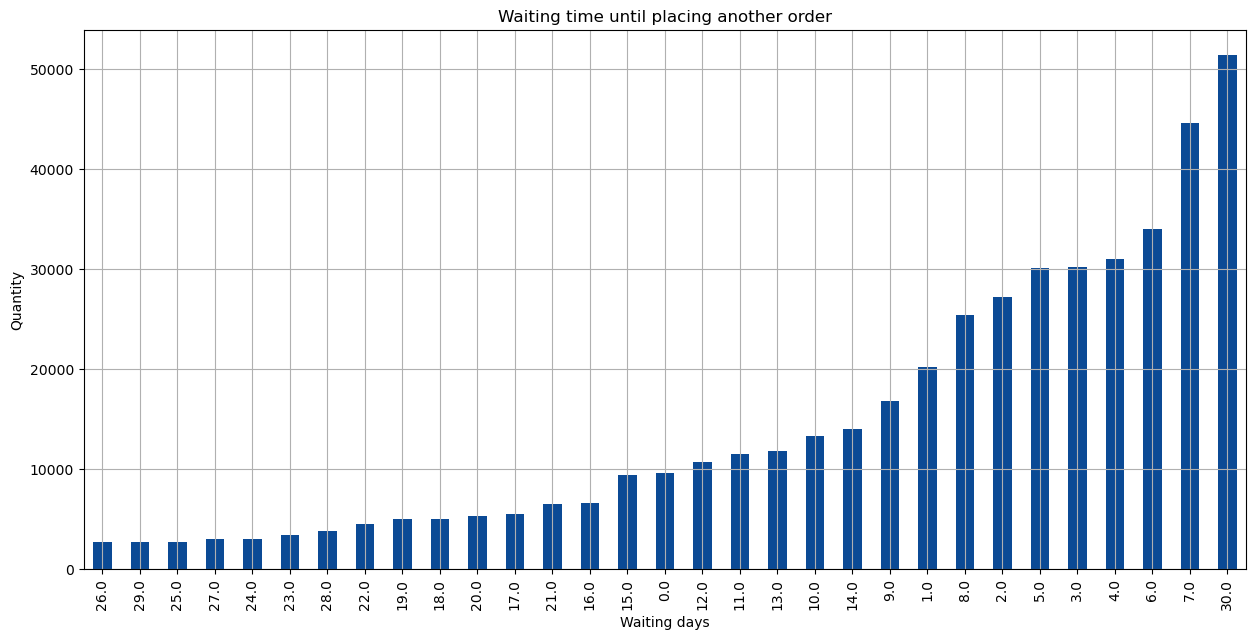

In [42]:
wating_days = df_orders['days_since_prior_order'].value_counts().sort_values()

wating_days.plot(kind='bar', 
                xlabel='Waiting days',
                ylabel='Quantity',
                title='Waiting time until placing another order',
                figsize=[15,7],
                grid=True,
                color='#0b4a95')
plt.show()

Las personas en su mayoría esperan 30 días para realizar su próximo pedido y no muchas personas esperan 26 días para realizar un pedido.

[Volver a Contenidos](#back)

### Sección B<a id='section_b'></a>


1. ¿Hay alguna diferencia en las distribuciones de 'order_hour_of_day' en miércoles y sábados? Trazar los histogramas de ambos días en el mismo gráfico y describir las diferencias observadas.
2. Trazar la distribución del número de pedidos que hacen los clientes(por ejemplo, cuántos clientes hicieron un solo pedido, cuántos hicieron solo dos, cuántos solo tres, etc.)
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (mostrar su identificación y nombre)?

[Volver a Contenidos](#back)

#### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

In [43]:
wednesday = df_orders[df_orders['order_dow']==3]['order_hour_of_day'].value_counts().sort_index()

saturday = df_orders[df_orders['order_dow']==6]['order_hour_of_day'].value_counts().sort_index()

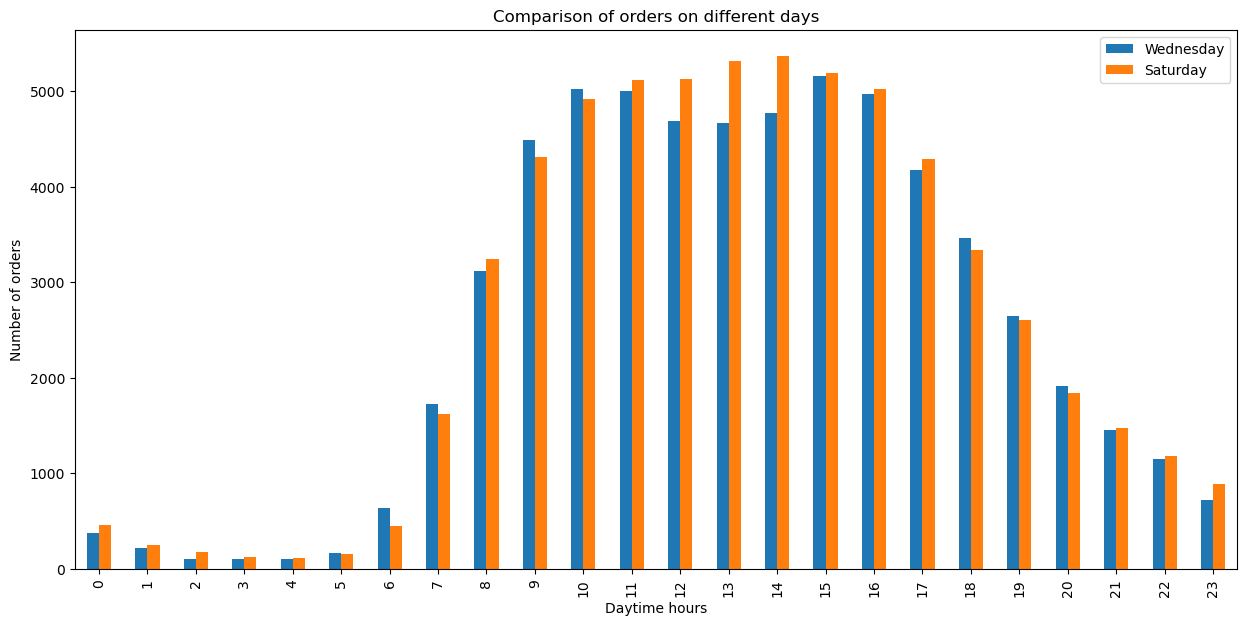

In [44]:
days = pd.concat([wednesday, saturday], axis='columns')

days.plot(kind='bar',
               xlabel='Daytime hours',
               ylabel='Number of orders',
               title='Comparison of orders on different days',
               figsize=[15,7]
              )
plt.legend(['Wednesday', 'Saturday'])
plt.show()

El gráfico exhibe una distribución en forma de campana, mostrando datos normalizados que se inclinan hacia la media. Asimismo, revela similitudes en el número de órdenes realizadas por los usuarios bajo condiciones similares, específicamente durante ciertas horas del día.

[Volver a Contenidos](#back)

#### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
orders = df_orders.groupby(by='order_number')['user_id'].count().sort_index()

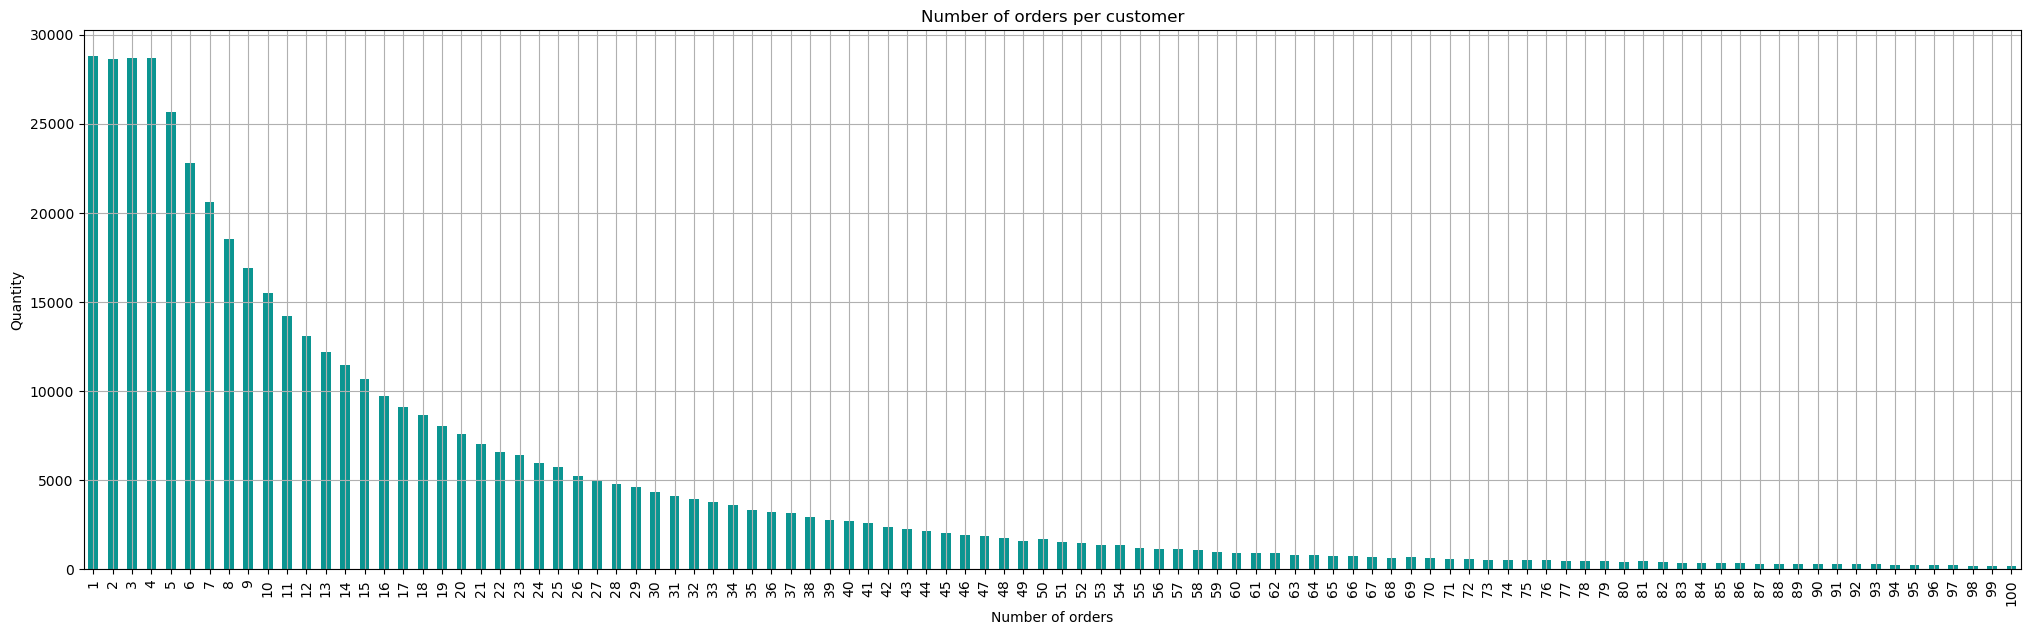

In [46]:
orders.plot(kind='bar', 
                xlabel='Number of orders',
                ylabel='Quantity',
                title='Number of orders per customer',
                figsize=[25,7],
                grid=True,
                color='#0b9591')
plt.show()

A medida que el número de pedidos aumenta, la cantidad de clientes disminuye. Esto sugiere que 'Instacart' podría carecer de funcionalidades, características, ofertas u otras acciones que faciliten la retención de usuarios.

[Volver a Contenidos](#back)

#### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
#Combinar dataframes df_order_products y df_products para obtener los nombres de los productos

popular_products = df_order_products.merge(df_products, on='product_id')

In [48]:
#Se agrupan los productos y se incluye la función  agregada para obtener el conteo de productos comprados
#posteriormente se ordenan según el número de compras de un producto y se muestran los primeros 20 resultados
popular_products_names = popular_products.groupby(['product_id', 'product_name']).agg(order_count=('order_id', 'count')).sort_values(by='order_count', ascending=False).reset_index()[:20]

popular_products_names

,product_id,product_name,order_count
0,24852,BANANA,66050
1,13176,BAG OF ORGANIC BANANAS,53297
2,21137,ORGANIC STRAWBERRIES,37039
3,21903,ORGANIC BABY SPINACH,33971
4,47209,ORGANIC HASS AVOCADO,29773
5,47766,ORGANIC AVOCADO,24689
6,47626,LARGE LEMON,21495
7,16797,STRAWBERRIES,20018
8,26209,LIMES,19690
9,27845,ORGANIC WHOLE MILK,19600


El análisis de los 20 productos más solicitados revela una notable tendencia hacia productos orgánicos. La alta demanda de estos productos puede deberse a una creciente conciencia sobre la salud y la sostenibilidad.

[Volver a Contenidos](#back)

### Sección C<a id='section_c'></a>

1. ¿Cuántos artículos compra la gente por lo general en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que se vuelven a pedir con más frecuencia (mostrar sus nombres e identificaciones de producto)?
3. Para cada producto, ¿qué proporción de sus pedidos se vuelven a pedir (crear una tabla con columnas para el ID del producto, el nombre del producto y la proporción en que se ha vuelto a comprar)?
4. ¿Cuál es la proporción de productos pedidos que se vuelven a pedir para cada cliente?
5. ¿Cuáles son los 20 principales artículos que la gente pone en sus carritos primero (mostrar las identificaciones de los productos, los nombres de los productos y el número de veces que fueron el primer artículo añadido al carrito)?

[Volver a Contenidos](#back)

#### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [66]:
#Agrupar por ordenes->nos indica cuantos productos se compraron en esa orden
items = df_order_products.groupby(by='order_id')['product_id'].count()

#De las ordenes únicamente necesitamos su cantidad de productos y se realiza un conteo de cada una
total_items = items.value_counts().sort_index()
total_items

product_id
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64

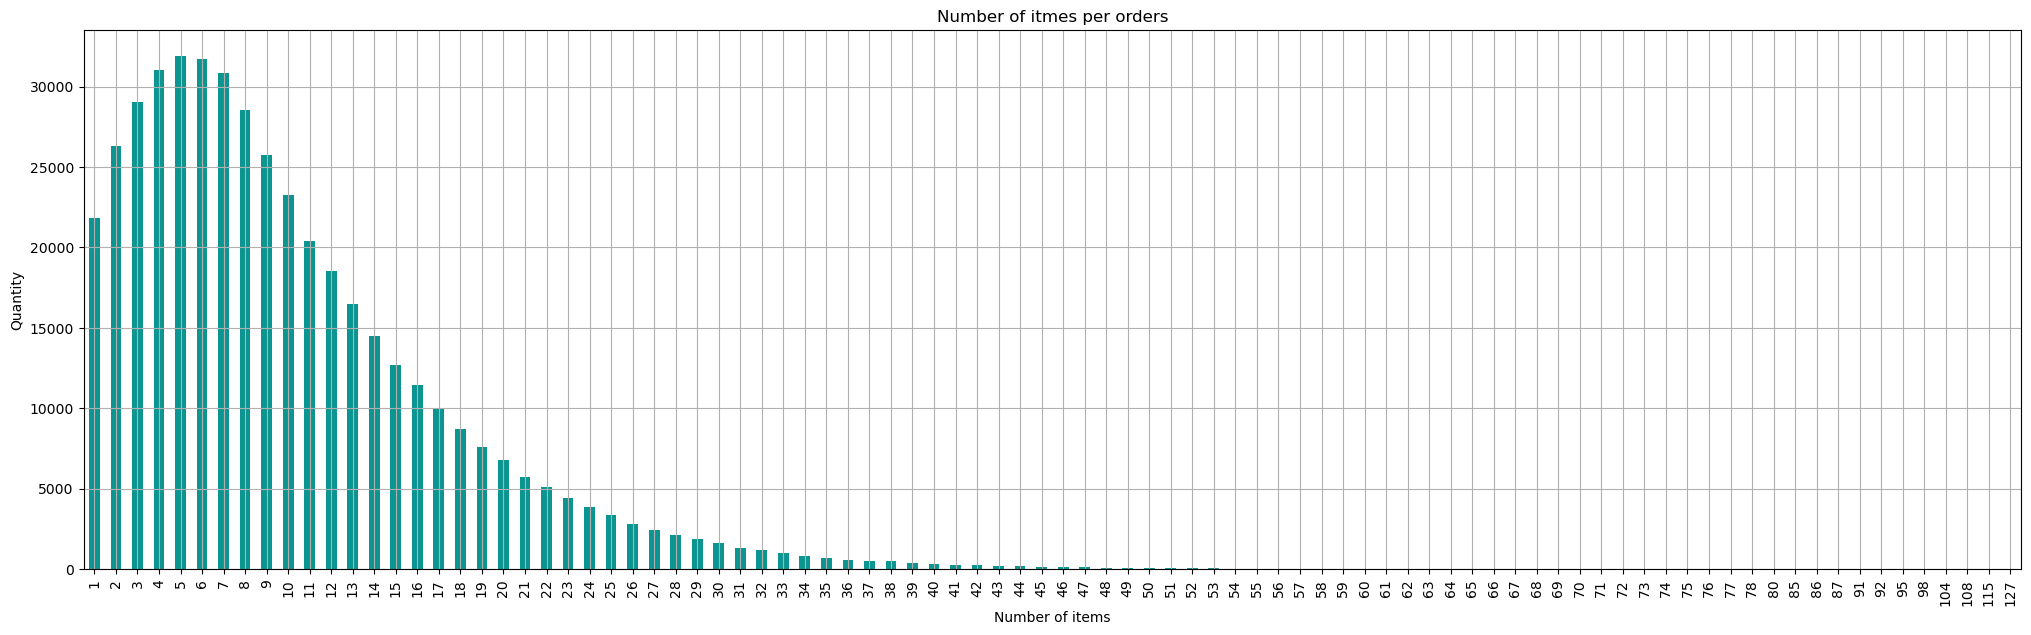

In [50]:
total_items.plot(kind='bar', 
                xlabel='Number of items',
                ylabel='Quantity',
                title='Number of itmes per orders',
                figsize=[25,7],
                grid=True,
                color='#0b9591')
plt.show()

La gráfica exhibe una distribución logarítmica donde la cantidad de productos en un pedido aumenta hasta alcanzar un máximo de 5 unidades, que representa la cantidad máxima típica de productos adquiridos. A partir de este punto, la frecuencia de pedidos con un mayor número de productos disminuye gradualmente.

[Volver a Contenidos](#back)

#### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?

In [51]:
#Combinar dataframes df_order_products y df_products para obtener los nombres de los productos

all_products = df_order_products.merge(df_products, on='product_id')
all_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
...,...,...,...,...,...,...,...
4524190,577211,15290,12,1,ORANGE BELL PEPPER,83,4
4524191,1219554,21914,9,0,PEANUT BUTTER & JELLY FRUIT & NUT FOOD BAR,3,19
4524192,692640,47766,4,1,ORGANIC AVOCADO,24,4
4524193,319435,691,8,1,ORGANIC PROMISE STRAWBERRY FIELDS CEREAL,121,14


In [52]:
#Filtrar el dataframe para obtener los productos que se han pedido más de una vez
frequently_products = all_products.loc[all_products['reordered'] == 1, ['product_id', 'product_name']]

#Agrupar los datos por producto, realizar un conteo para determinar cuales son los más frecuentes y ordenarlos descendentemente
frequently_products = frequently_products.groupby(['product_id', 'product_name']).agg(order_count=('product_id', 'count')).sort_values(by='order_count', ascending=False).reset_index()[:20]

In [53]:
frequently_products

,product_id,product_name,order_count
0,24852,BANANA,55763
1,13176,BAG OF ORGANIC BANANAS,44450
2,21137,ORGANIC STRAWBERRIES,28639
3,21903,ORGANIC BABY SPINACH,26233
4,47209,ORGANIC HASS AVOCADO,23629
5,47766,ORGANIC AVOCADO,18743
6,27845,ORGANIC WHOLE MILK,16251
7,47626,LARGE LEMON,15044
8,27966,ORGANIC RASPBERRIES,14748
9,16797,STRAWBERRIES,13945


Anteriormente, se determinó que los productos orgánicos son los más populares en la plataforma de 'Instacart' y que estos suelen generar un mayor número de frecuencia de órdenes de estos productos.

[Volver a Contenidos](#back)

#### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [54]:
# Utilizamos el df all_products el cual tiene la combinación del df orders y df order_products
all_products 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
...,...,...,...,...,...,...,...
4524190,577211,15290,12,1,ORANGE BELL PEPPER,83,4
4524191,1219554,21914,9,0,PEANUT BUTTER & JELLY FRUIT & NUT FOOD BAR,3,19
4524192,692640,47766,4,1,ORGANIC AVOCADO,24,4
4524193,319435,691,8,1,ORGANIC PROMISE STRAWBERRY FIELDS CEREAL,121,14


In [55]:
repetition_rate = all_products.groupby('product_name')['reordered'].mean().reset_index()

repetition_rate.columns=['product', 'repetition_rate']

repetition_rate

,product,repetition_rate
0,#2 COFFEE FILTERS,0.254545
1,#2 CONE WHITE COFFEE FILTERS,0.000000
2,#2 MECHANICAL PENCILS,0.000000
3,#4 NATURAL BROWN COFFEE FILTERS,0.358974
4,& GO! HAZELNUT SPREAD + PRETZEL STICKS,0.466667
...,...,...
44511,"\""DARN GOOD\"" CHILI MIX",0.400000
44512,"\""IM PEI-NUT BUTTER\"" DOUBLE CHOCOLATE COOKIE ...",0.400000
44513,"\""LOUIS BA-KAHN\"" CHOCOLATE CHIP COOKIE & BROW...",0.000000
44514,"\""MIES VANILLA ROHE\"" ICE CREAM BARS",0.500000


Un número significativo de artículos pertenece al grupo de productos que suelen ser comprados nuevamente. Sin embargo, también hay casos en los que no se realiza una segunda compra de un artículo. Estos productos podrían ser candidatos para acciones correctivas que fomenten su compra repetida.

[Volver a Contenidos](#back)

#### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?


In [56]:
orders_clients = df_orders.merge(df_order_products, on='order_id')
orders_clients

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048,1,1
1,1515936,183418,11,6,13,30.0,47766,3,1
2,1515936,183418,11,6,13,30.0,45066,9,0
3,1515936,183418,11,6,13,30.0,24082,11,0
4,1515936,183418,11,6,13,30.0,24363,4,0
...,...,...,...,...,...,...,...,...,...
4545002,2071924,1730,18,1,14,15.0,1503,17,0
4545003,2071924,1730,18,1,14,15.0,4778,12,1
4545004,2071924,1730,18,1,14,15.0,11512,1,1
4545005,2071924,1730,18,1,14,15.0,4920,6,1


In [57]:
repetiton_rate_clients = orders_clients.groupby('user_id')['reordered'].mean().reset_index()
repetiton_rate_clients

,user_id,reordered
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571
...,...,...
149621,206203,0.222222
149622,206206,0.714286
149623,206207,0.891304
149624,206208,0.696000


Generalmente, hay una relación entre los productos que son comprados nuevamente y los clientes que los adquieren. En algunos casos, los usuarios eligen volver a comprar un producto, mientras que en otros deciden no hacerlo. En estos últimos casos, se realizaría un estudio para entender las razones por las cuales los clientes optan por no volver a comprar en la tienda y buscar aumentar el tiempo de permanencia de los clientes en la empresa.

[Volver a Contenidos](#back)

#### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?


In [58]:
first_product = all_products[all_products['add_to_cart_order']==1]

first_product = first_product.groupby(['product_id','product_name'])['add_to_cart_order'].count().sort_values(ascending=False).reset_index().head(20)

first_product.columns.values[2]='number_of_times_to_be_the_first_item'

first_product

,product_id,product_name,number_of_times_to_be_the_first_item
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


La tendencia generalmente se mantiene constante: los productos orgánicos son los más populares entre los clientes y tienen una demanda significativamente alta en la plataforma de Instacart.

[Volver a Contenidos](#back)

## Conclusion general del proyecto <a id='end'></a>

Instacart, una plataforma de entrega de comestibles, presentaba en su datawarehouse un conjunto de datos que requerían ser limpiados para una mejor manejo procesamiento de información y realizar un análisis detallado. Se inició el proceso estandarizando los archivos CSV, especificando el carácter de separación. La limpieza incluyó la identificación y eliminación de duplicados con `duplicated()`, así como el manejo de valores ausentes utilizando `fillna()`. Además, se corrigieron tipos de datos mediante `astype()`.

En cuanto a los resultados clave, el análisis revela patrones notables en el comportamiento de compra. Destaca la preferencia constante por productos orgánicos, que lideran en popularidad y demanda en la plataforma. Se observa una relación entre la repetición de pedidos y ciertos productos, algunos de los cuales son adquiridos nuevamente con mayor frecuencia.

Reflexionando sobre las elecciones de procesamiento de datos, estas influyeron positivamente en la calidad de los resultados. Las estrategias aplicadas facilitaron un análisis más preciso y revelador. Con relación a los objetivos iniciales, el análisis abordó con éxito la comprensión de patrones de compra, cumpliendo con los objetivos del proyecto.

En conclusión, este proyecto no solo abordó eficazmente el procesamiento y análisis de datos en Instacart, sino que también proporciona valiosas perspectivas sobre los hábitos de compra. Estas conclusiones tienen el potencial de influir en decisiones estratégicas y mejorar la experiencia del cliente, destacando la importancia de un análisis de datos sólido en el contexto empresarial.

[Volver a Contenidos](#back)